### Load libraries

In [ ]:

from dingo import MetabolicNetwork
import numpy as np

import sys
sys.path.insert(0, '../scripts/')
from load_modify_sample_utils import load_model, get_objective_functions, get_reaction_bounds, modify_model
from load_modify_sample_utils import sample_dingo, sample_optgp, sampling_statistics, export_to_pickle
from loopless_utils import get_loopless_solutions_from_samples, loops_enumeration_from_fva, loopy_reactions_turned_off_in_pfba
from loopless_utils import calculate_distances_from_samples, calculate_distances_from_reactions, violin_plot_samples_distances


/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/touliopoulos/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Load model

In [2]:

loopy_cobra_model, loopy_cobra_model_reactions, loopy_dingo_model, loopy_dingo_model_reactions = load_model("/home/touliopoulos/iAF1260.xml")


Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25


### Sample the default model

In [11]:

samples_default = sample_optgp(loopy_cobra_model, n_samples = 3000, thinning = 100, reaction_in_rows = True)

samples_loopless_solutions = get_loopless_solutions_from_samples(samples_default, loopy_cobra_model)


Read LP format model from file /tmp/tmp5an7vzyq.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


/home/touliopoulos/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning:

Solver status is 'infeasible'.



### Find differences with loopless_solutions

In [16]:

distances_array = calculate_distances_from_samples(samples_default, samples_loopless_solutions, loopy_cobra_model)
violin_plot_samples_distances(distances_array)


distances_array = calculate_distances_from_reactions(samples_default, samples_loopless_solutions, loopy_cobra_model)
violin_plot_samples_distances(distances_array)


In [32]:
distances_array = calculate_distances_from_reactions(samples_default, samples_loopless_solutions, loopy_cobra_model)
mean_distance = np.mean(distances_array)
std_distance = np.std(distances_array)
dist_tol = mean_distance+(0.01*std_distance)

outliers = np.where(distances_array > dist_tol)[0]
print(len(outliers))

for outlier in outliers:
    print(loopy_dingo_model_reactions[outlier])

68
ACKr
ABUTt2pp
ACACT1r
ACCOAL
ACS
ACt2rpp
ACt4pp
ADK1
ADK3
ADNt2pp_copy1
ADNt2pp_copy2
ALATA_L
CA2t3pp
CAt6pp
CRNDt2rpp
CRNt2rpp
CRNt8pp
CYTDt2pp_copy1
CYTDt2pp_copy2
GLCtex_copy1
GLCtex_copy2
GLDBRAN2
GLGC
GLUABUTt7pp
GLBRAN2
GLCP
GLCP2
GLCS1
GLUt2rpp
GLUt4pp
GLYCLTt2rpp
GLYCLTt4pp
ICHORS_copy1
ICHORS_copy2
HPYRI
HPYRRx
INDOLEt2pp
INDOLEt2rpp
INSt2pp_copy1
INSt2pp_copy2
KAT1
NDPK1
PPAKr
PPCSCT
PPK
PPM
PROt2rpp
PROt4pp
PRPPS
PTA2
PTAr
R15BPK
R1PK
SERt2rpp
SERt4pp
THMDt2pp_copy1
THMDt2pp_copy2
THRt2rpp
THRt4pp
SUCOAS
TRSARr
URAt2pp_copy1
URAt2pp_copy2
NAt3pp
URIt2pp_copy1
URIt2pp_copy2
VALTA
VPAMTr


### Identify loopy reactions

In [3]:

loopy_reaction_list_fva_opt_1 = loops_enumeration_from_fva(loopy_cobra_model, fraction_of_optimum=1)
print(loopy_reaction_list_fva_opt_1)
print(len(loopy_reaction_list_fva_opt_1))


sorted_data = sorted(loopy_reaction_list_fva_opt_1, key=lambda x: x[1], reverse=True)
loopy_reactions_opt_1 = [rxn for rxn, val in sorted_data]
print(len(loopy_reactions_opt_1))


[('ACKr', 999996.2758773536), ('ABUTt2pp', 999999.0000000001), ('ACACT1r', 999999.0000000003), ('ACCOAL', 999999.0), ('ACOATA', 0.26214766426882996), ('ACS', 999996.2758773596), ('ADK1', 999999.0677912326), ('ADK3', 999998.5073629228), ('ADNt2pp_copy1', 999999.0), ('ADNt2pp_copy2', 999999.0), ('ALATA_L', 999998.2587852945), ('ASPO4', 0.001678205534464648), ('ASPO5', 0.0016782053038602233), ('CA2t3pp', 999998.9965102477), ('CAt6pp', 999998.9965102477), ('CRNDt2rpp', 999998.9999999985), ('CRNt2rpp', 999999.0000000164), ('CRNt8pp', 999999.0000000001), ('CYTDt2pp_copy1', 999999.0), ('CYTDt2pp_copy2', 999999.0), ('DMPPS', 0.0017599784997242545), ('DHAPT', 1.0269383352932429), ('DHORD2', 0.2436933027479824), ('DHORD5', 0.24369330214273033), ('F6PA', 1.0269383588281076), ('FBA', 1.0269383588194962), ('FRD2', 28.80159885933089), ('FRD3', 28.556227351021743), ('FLDR', 0.038558927140187466), ('GLCtex_copy1', 999991.0), ('GLCtex_copy2', 999991.0), ('GLDBRAN2', 999999.0), ('GLGC', 999996.703902091

### Turn off loopy reaction with 0 value in pFBA

In [ ]:

turned_off_in_pfba = loopy_reactions_turned_off_in_pfba(loopy_cobra_model, loopy_reactions_opt_1)
    
turned_off_in_pfba = list(set(turned_off_in_pfba))
print(len(turned_off_in_pfba))



loopy_cobra_model_turned_off_loopy_reactions = loopy_cobra_model.copy()

for rid in turned_off_in_pfba:
    loopy_cobra_model_turned_off_loopy_reactions.reactions.get_by_id(rid).bounds = (0, 0)
        

Read LP format model from file /tmp/tmplnom0o_y.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


### Perform FBA to see if biomass changed

In [8]:

solution_before_removal = loopy_cobra_model.optimize()
print(solution_before_removal.objective_value)

solution_after_removal = loopy_cobra_model_turned_off_loopy_reactions.optimize()
print(solution_after_removal.objective_value)

if (solution_after_removal.objective_value - solution_before_removal.objective_value) < 1e-6:
    print("Not Significant Change in Objective Value")



0.7367009388648783
0.7367009388648776
Not Significant Change in Objective Value


### Sampling og the reduced (removed loopy reactions) model

In [7]:

samples_optgp_loopless_model = sample_optgp(loopy_cobra_model_turned_off_loopy_reactions, n_samples = 3000, thinning = 100, reaction_in_rows = True)

samples_optgp_loopless_model_loopless_solutions = get_loopless_solutions_from_samples(samples_optgp_loopless_model, loopy_cobra_model_turned_off_loopy_reactions)


Read LP format model from file /tmp/tmpg702wyz4.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


/home/touliopoulos/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [9]:

distances_array = calculate_distances_from_samples(samples_optgp_loopless_model, samples_optgp_loopless_model_loopless_solutions, loopy_cobra_model_turned_off_loopy_reactions)
violin_plot_samples_distances(distances_array)


distances_array = calculate_distances_from_reactions(samples_optgp_loopless_model, samples_optgp_loopless_model_loopless_solutions, loopy_cobra_model_turned_off_loopy_reactions)
violin_plot_samples_distances(distances_array)


### Check is outlier loopy reactions from reduced model are inside the loopy reactions pool FVA returns, or if they are outliers in the initial distances array.

In [34]:
   
distances_array_default_sampling = calculate_distances_from_reactions(samples_default, samples_loopless_solutions, loopy_cobra_model)
mean_distance = np.mean(distances_array_default_sampling)
std_distance = np.std(distances_array_default_sampling)
dist_tol = mean_distance+(0.01*std_distance)

outliers_default_sampling = np.where(distances_array_default_sampling > dist_tol)[0]



distances_array_loopless_sampling = calculate_distances_from_reactions(samples_optgp_loopless_model, samples_optgp_loopless_model_loopless_solutions, loopy_cobra_model_turned_off_loopy_reactions)

outliers_loopless_sampling = np.where(distances_array_loopless_sampling > 500)[0]
print(outliers_loopless_sampling)

for outlier in outliers_loopless_sampling:
    print(loopy_dingo_model_reactions[outlier], outlier in loopy_reaction_list_fva_opt_1, outlier in outliers_default_sampling)

    


[ 191  331  501  506  508 2001 2054 2061 2110]
ADK1 False True
ATPS4rpp False False
CYTBD2pp False False
CYTBDpp False False
CYTBO3_4pp False False
PPK False True
NADH10 False False
NADH16pp False False
NADH5 False False


/tmp/ipykernel_12827/1677383405.py:16: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



### Check if outlier reactions are loopy across most of the samples

12.734369657590003


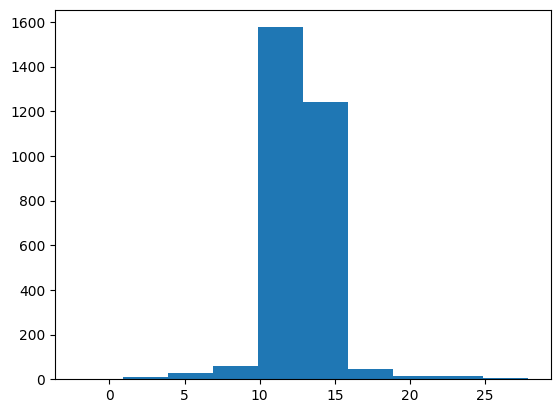

33.28038532102482


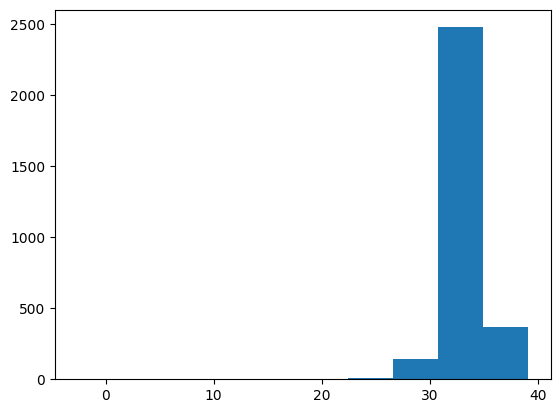

In [21]:

import matplotlib.pyplot as plt


change_per_reaction = abs(samples_optgp_loopless_model) - abs(samples_optgp_loopless_model_loopless_solutions)
   
reaction_index = loopy_dingo_model_reactions.index("ADK1")
change = change_per_reaction[reaction_index]
mean_change = np.mean(change_per_reaction[reaction_index])

print(mean_change)
plt.hist(change)
plt.show()


reaction_index = loopy_dingo_model_reactions.index("ATPS4rpp")
change = change_per_reaction[reaction_index]
mean_change = np.mean(change_per_reaction[reaction_index])

print(mean_change)
plt.hist(change)
plt.show()
